In [3]:
#data link = https://www.kaggle.com/c/digit-recognizer/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
d0 = pd.read_csv('D:/Applied AI Course/13 DIMENSIONALITY REDUCTION AND VISUALIZATION/data/train.csv')

In [5]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l = d0['label']

In [7]:
d = d0.drop('label',axis=1)

In [8]:
d.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


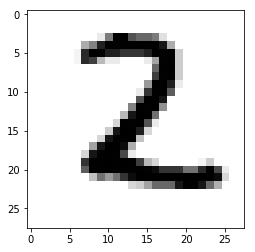

In [9]:
plt.figure(figsize=(4,4))
idx = 101

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
#print(grid_data)
plt.imshow(grid_data,cmap = "binary")
plt.show()

In [10]:
print(l[idx])

2


In [11]:
labels = l.head(15000)
data = d.head(15000)

In [12]:
from sklearn.preprocessing import StandardScaler #importing from featurewise standardization

In [13]:
stand_data = StandardScaler().fit_transform(data)

In [14]:
stand_data.shape

(15000, 784)

In [15]:
covar_matrix = np.matmul(stand_data.T,stand_data)

In [16]:
covar_matrix.shape #(784*15000)*(15000*784) also known as S

(784, 784)

In [17]:
#TOP 2 eign values
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix, eigvals=(782,783))

In [18]:
values

array([435532.55785282, 605719.29173629])

In [19]:
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [20]:
new_coordinates = np.matmul(vectors,stand_data.T)

In [21]:
new_coordinates.shape

(2, 15000)

In [22]:
print(new_coordinates)

[[-5.5586608   6.19363477 -1.90987794 ... -2.14793723  3.20412249
  -6.87896871]
 [-5.04355835 19.30527806 -7.67877525 ... -1.50726893 -6.53731291
  -1.25625388]]


In [23]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, labels))

In [24]:
new_coordinates = new_coordinates.T

In [25]:
new_coordinates = new_coordinates[:,0:3]

In [26]:
new_coordinates

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

In [27]:
dataframe = pd.DataFrame( data=new_coordinates, columns = ("1'st principal", "2'nd principal", "labels"))
print(dataframe.head())

   1'st principal  2'nd principal  labels
0       -5.558661       -5.043558     1.0
1        6.193635       19.305278     0.0
2       -1.909878       -7.678775     1.0
3        5.525748       -0.464845     4.0
4        6.366527       26.644289     0.0


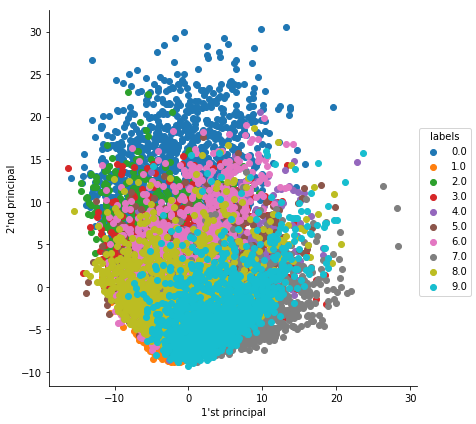

In [28]:
#plot the 2D data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue = 'labels',size = 6).map(plt.scatter, "1'st principal","2'nd principal").add_legend()
plt.show()

# PCS using Scikit-Learn

In [29]:
from sklearn import decomposition
pca = decomposition.PCA()

In [30]:
#configure the parameters and components to 2
pca.n_components = 2
pca_data = pca.fit_transform(stand_data)#here no need to calcuate S and eighn vectors and 1st and 2nd

In [31]:
pca_data.shape

(15000, 2)

In [32]:
pca_data = np.vstack((pca_data.T,labels)).T

In [33]:
pca_data

array([[-5.04359024, -5.55927994,  1.        ],
       [19.30526286,  6.19339051,  0.        ],
       [-7.67876   , -1.90973606,  1.        ],
       ...,
       [-1.50728132, -2.14881678,  8.        ],
       [-6.53729561,  3.2041814 ,  9.        ],
       [-1.25626773, -6.8792224 ,  6.        ]])

In [34]:
pca_df = pd.DataFrame(data=pca_data,columns = ("1st","2nd","labels"))

In [35]:
pca_df

,1st,2nd,labels
0,-5.043590,-5.559280,1.0
1,19.305263,6.193391,0.0
2,-7.678760,-1.909736,1.0
3,-0.464846,5.526339,4.0
4,26.644291,6.366616,0.0
5,1.201267,-0.557271,0.0
6,-6.118894,6.440604,7.0
7,0.215548,4.422535,3.0
8,-0.724668,-1.315847,5.0
9,3.106033,-2.603059,3.0


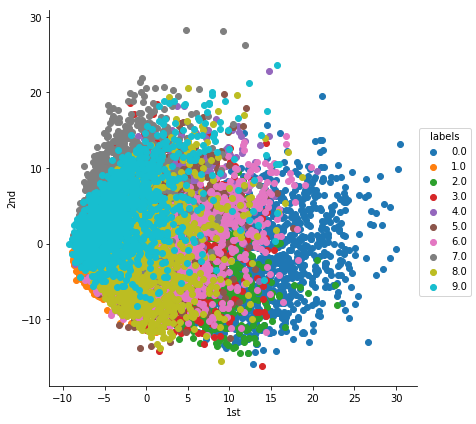

In [36]:
sn.FacetGrid(pca_df, hue="labels",size = 6).map(plt.scatter, '1st','2nd').add_legend()
plt.show()

# Using t-sne technique

In [40]:
from sklearn.manifold import TSNE
#pick the top 1000 data points
data_1000 = stand_data[0:1000,:]
labels_1000 = labels[0:1000]

In [41]:
data_1000

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
labels_1000

0      1
1      0
2      1
3      4
4      0
5      0
6      7
7      3
8      5
9      3
10     8
11     9
12     1
13     3
14     3
15     1
16     2
17     0
18     7
19     5
20     8
21     6
22     2
23     0
24     2
25     3
26     6
27     9
28     9
29     7
      ..
970    7
971    3
972    7
973    8
974    0
975    1
976    0
977    2
978    9
979    7
980    6
981    2
982    2
983    6
984    9
985    0
986    6
987    8
988    8
989    9
990    6
991    3
992    5
993    0
994    2
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64

In [43]:
#making model of tsne
model = TSNE(n_components=2,random_state=0)
#configure
#defalus perplexity = 30 iteration =1000

In [45]:
tsne_data = model.fit_transform(data_1000)

In [49]:
tsne_data = np.vstack((tsne_data.T,labels_1000)).T

In [63]:
tsne_data = tsne_data[:,0:3]

In [64]:
tsne_data

array([[ 10.87505722,  20.93338013,   1.        ],
       [ 27.55082512, -40.43898773,   0.        ],
       [ -5.55123043,  11.01754189,   1.        ],
       ...,
       [-30.66103554,  16.59022522,   9.        ],
       [ 42.86341858,  -6.89698172,   6.        ],
       [-21.3349762 ,  -0.41105139,   4.        ]])

In [65]:
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","label"))

In [66]:
tsne_df

,Dim 1,Dim 2,label
0,10.875057,20.933380,1.0
1,27.550825,-40.438988,0.0
2,-5.551230,11.017542,1.0
3,-30.952522,-9.390717,4.0
4,33.062794,-41.947834,0.0
5,22.256592,-27.009277,0.0
6,-31.497463,22.662323,7.0
7,-14.889652,-7.999552,3.0
8,2.644372,-1.931257,5.0
9,1.254215,-19.449018,3.0


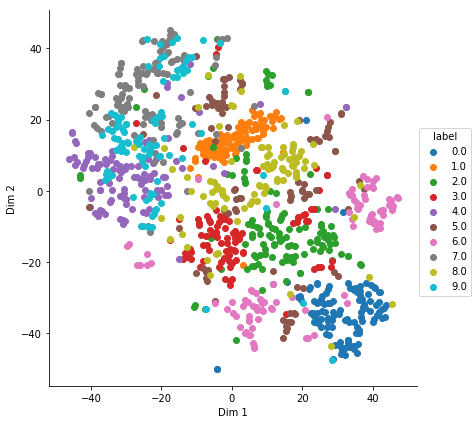

In [68]:
sn.FacetGrid(tsne_df,hue = "label",size=6).map(plt.scatter, 'Dim 1','Dim 2').add_legend()